In [7]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("sensor-reading.csv")

# Get the number of missing entries for each feature
missing_counts = data.isnull().sum()

# Print feature names with numbers of missing entries (if count is not zero)
print("Feature Name\t\tNumber of Missing Entries")
for feature, count in missing_counts.items():
    if count != 0:
        print(f"{feature.ljust(20)}\t{count}")


Feature Name		Number of Missing Entries
elevation           	21595
Position            	56570


In [4]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("sensor-reading.csv")

# Get the number of missing entries for each feature
missing_counts = data.isnull().sum()

# Print feature names with numbers of missing entries (if count is not zero)
print("Feature Name\t\tNumber of Missing Entries")
for feature, count in missing_counts.items():
    if count != 0:
        print(f"{feature.ljust(20)}\t{count}")
        # Calculate the mean only for features with missing values
        feature_mean = data[feature].mean()
        print(f"Mean of {feature}: {feature_mean}")

# Fill missing entries with the mean value for each feature
filled_data = data.fillna(feature_means)


Feature Name		Number of Missing Entries
elevation           	21595
Mean of elevation: 12.973809578270192
Position            	56570
Mean of Position: nan


In [6]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("sensor-reading.csv")

# Downcast numeric data types
numeric_cols = data.select_dtypes(include=['float64']).columns
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, downcast='float')

# Encode categorical data
data['location'] = pd.factorize(data['location'])[0]

# Remove redundant columns if any
# Example: data.drop(['redundant_column1', 'redundant_column2'], axis=1, inplace=True)

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Save the modified DataFrame into a CSV file
data.to_csv("optimized_sensor_reading.csv", index=False)

# Display the optimized DataFrame
print("Optimized DataFrame:")
print(data.head())

# Upload the CSV file to OnTrack
# You can upload the "optimized_sensor_reading.c




Encoded Values:
                   timestamp               mac  boardtype  boardid  temp_max  \
0  2015-05-31T05:00:00+10:00  0013a20040b3155c          1      506      13.9   
1  2015-05-31T07:05:00+10:00  0013a20040b3155c          1      506      12.9   
2  2015-05-31T08:55:00+10:00  0013a20040b3155c          1      506      13.2   
3  2015-05-31T10:00:00+10:00  0013a20040b3155c          1      506      12.9   
4  2015-05-31T10:10:00+10:00  0013a20040b3155c          1      506      12.9   

   temp_min  temp_avg  light_max  light_min  light_avg  ...  humidity_avg  \
0      13.9      13.9        8.3        8.3        8.3  ...          38.7   
1      12.9      12.9        8.1        8.1        8.1  ...          40.9   
2      13.2      13.2        8.2        8.2        8.2  ...          40.7   
3      12.9      12.9        8.3        8.3        8.3  ...          44.0   
4      12.9      12.9        8.4        8.4        8.4  ...          44.2   

   model   latitude   longitude  elevati

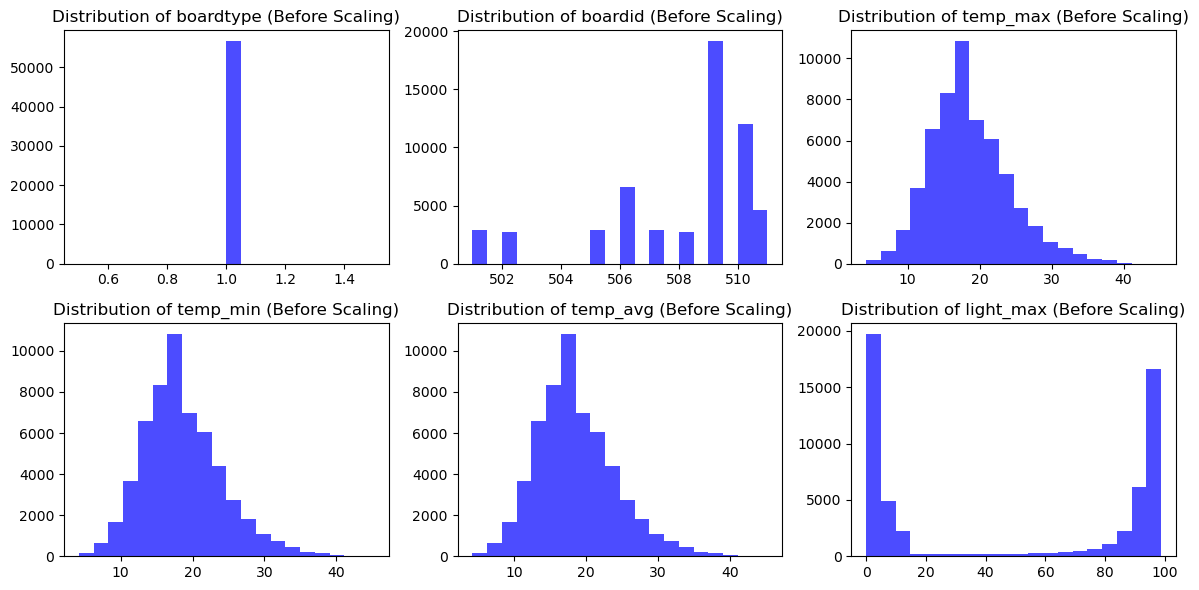

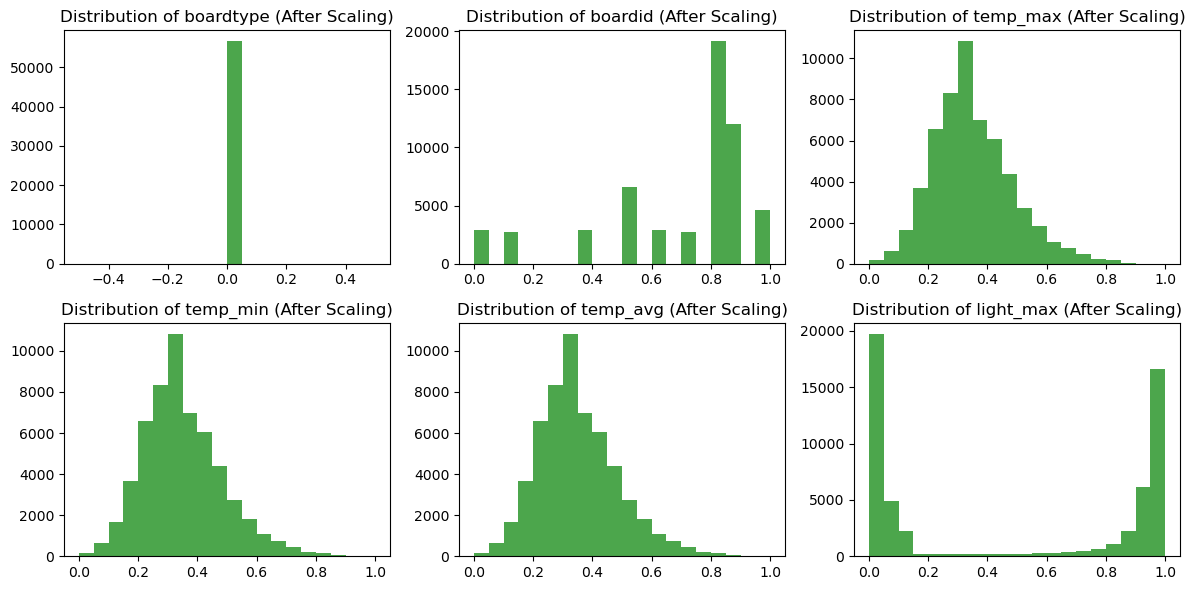

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Read the CSV file
data = pd.read_csv("sensor-reading.csv")

# Select the features for min-max scaling
features_to_scale = ['boardtype', 'boardid', 'temp_max', 'temp_min', 'temp_avg', 
                     'light_max', 'light_min', 'light_avg', 'humidity_min', 
                     'humidity_max', 'humidity_avg']

# Apply min-max scaling to selected features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features_to_scale])

# Update the DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Plot distributions before scaling
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_scale[:6]):
    plt.subplot(2, 3, i+1)
    plt.hist(data[feature], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature} (Before Scaling)')

plt.tight_layout()
plt.show()

# Plot distributions after scaling
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_scale[:6]):
    plt.subplot(2, 3, i+1)
    plt.hist(scaled_df[feature], bins=20, color='green', alpha=0.7)
    plt.title(f'Distribution of {feature} (After Scaling)')

plt.tight_layout()
plt.show()
